<a href="https://colab.research.google.com/github/CNielsen94/Random_data_repo/blob/main/notebooks/Python_solutions_workshop9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#10.1 How does a point estimator differ from an interval estimator?

A **point estimator** is used in statistics to provide the single best guess of an unknown parameter of a population. For example, the sample mean $\bar{x}$ is a point estimator of the population mean $\mu$.

An **interval estimator**, on the other hand, provides a range (interval) within which the parameter is expected to lie, with a certain level of confidence. This range is known as a confidence interval. It recognizes the uncertainty in the estimation process, offering an interval that likely contains the true parameter value for $\mu$. For example, we might be 95% confident that the population mean $\mu$ lies within the interval $\bar{x} - 1.96\frac{\sigma}{\sqrt{n}}$, $\bar{x} + 1.96\frac{\sigma}{\sqrt{n}}$, where $\sigma$ is the population standard deviation and $n$ is the sample size.



#10.3 Draw a curve over a sample distribution on a central (unbiased) estimator

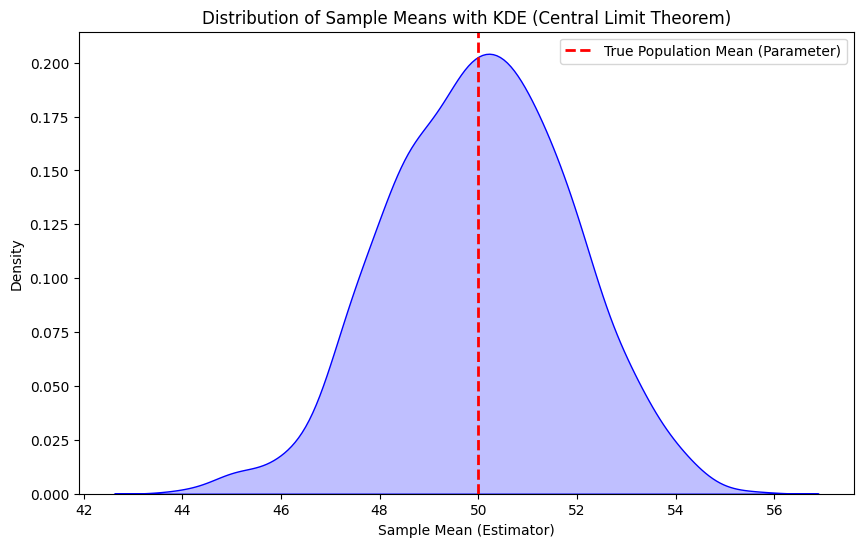

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for the population distribution
population_mean = 50
population_std = 10
population_size = 10000

# Generate a population
np.random.seed(42)  # for reproducibility
population = np.random.normal(population_mean, population_std, population_size)

# Simulate sampling
sample_size = 30
num_samples = 1000
sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]

# Plotting the distribution of sample means with KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(sample_means, color='blue', fill=True)
plt.title('Distribution of Sample Means with KDE (Central Limit Theorem)')
plt.xlabel('Sample Mean (Estimator)')
plt.ylabel('Density')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='True Population Mean (Parameter)')
plt.legend()
plt.show()


#10.4 Draw a curve over a sample distribution on a non-central (biased) estimator

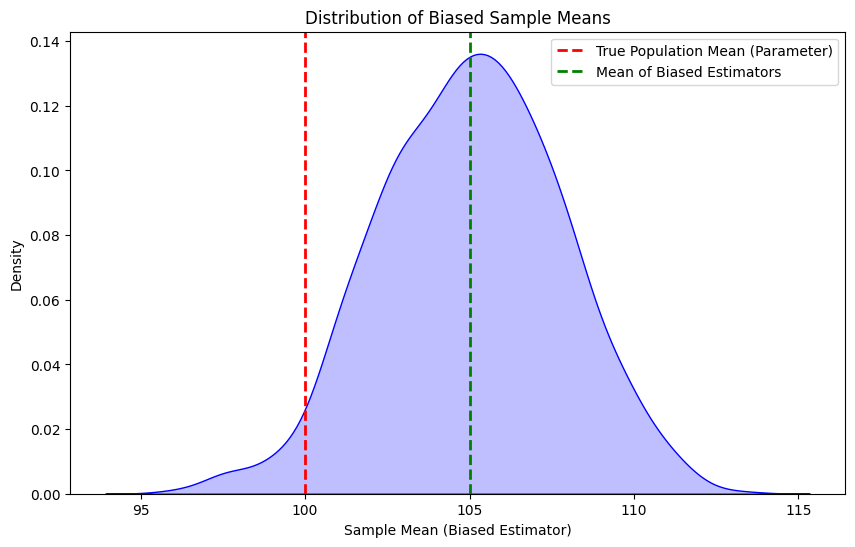

In [4]:
# Settings for the population distribution
population_mean = 100
population_std = 15
population_size = 10000

# Generate a population
np.random.seed(42)
population = np.random.normal(population_mean, population_std, population_size)

# Simulate sampling for biased estimator
sample_size = 30
num_samples = 1000
bias_amount = 5  # Adding a bias of 5 units to the estimator
biased_sample_means = [np.mean(np.random.choice(population, sample_size)) + bias_amount for _ in range(num_samples)]

# Calculate the true parameter and the mean of biased estimators
true_mean = population_mean
mean_biased_estimator = np.mean(biased_sample_means)

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(biased_sample_means, color='blue', fill=True)
plt.title('Distribution of Biased Sample Means')
plt.xlabel('Sample Mean (Biased Estimator)')
plt.ylabel('Density')
plt.axvline(true_mean, color='red', linestyle='dashed', linewidth=2, label='True Population Mean (Parameter)')
plt.axvline(mean_biased_estimator, color='green', linestyle='dashed', linewidth=2, label='Mean of Biased Estimators')
plt.legend()
plt.show()

In this plot, I've added a bias (bias_amount) of 5 units to the sample mean, so that the entire distribution shifts 5 units away from the true mean ($\mu$). The red dotted line is the true parameter value, and the blue dotted line is the biased estimate

#10.6 Draw curves that illustrate what happens with the sampling distribution on a consistent estimator as the sample size increases.

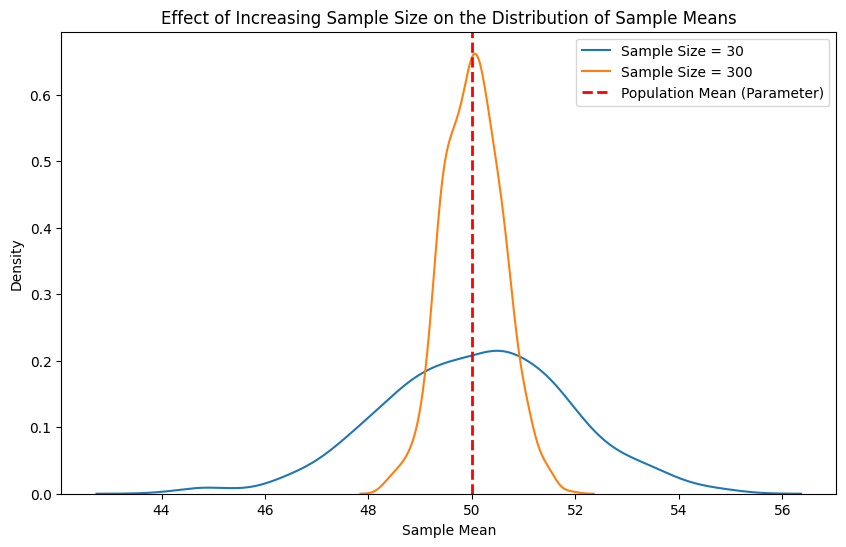

In [5]:
# Settings for the population
population_mean = 50
population_std = 10
population_size = 100000  # Large population size for simulation

# Generate the population
np.random.seed(42)
population = np.random.normal(population_mean, population_std, population_size)

# Different sample sizes to illustrate the effect on the sampling distribution
sample_sizes = [30, 300]
sample_means = {n: [] for n in sample_sizes}

for n in sample_sizes:
    for _ in range(1000):  # Generate 1000 sample means for each sample size
        sample = np.random.choice(population, n, replace=True)
        sample_means[n].append(np.mean(sample))

# Plotting
plt.figure(figsize=(10, 6))
for n in sample_sizes:
    sns.kdeplot(sample_means[n], label=f'Sample Size = {n}')

plt.title('Effect of Increasing Sample Size on the Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean (Parameter)')
plt.legend()
plt.show()


When the estimator for $\mu$ remains constant, whilst the sample size n increases, the distribution will become more narrowly concentrated around the estimator. **In this example**, it illustrates how the estimator of the sample mean $\mu$ seems to reflect the true parameter value, as the sample size n grows.

#10.8 Draw curves that illustrate what happens with the sample distribution on a consistent estimator as the sample size increases

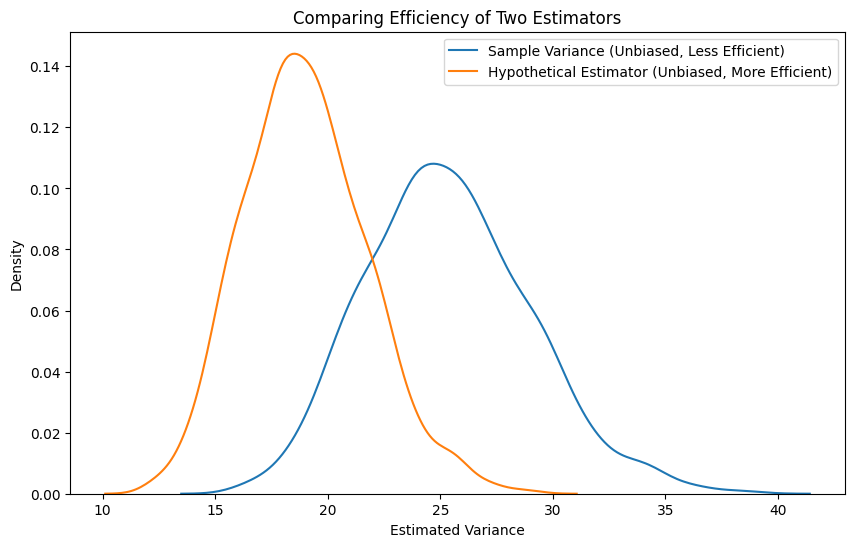

In [8]:
# Generate a population
population_variance = 25  # Assuming a variance
population = np.random.normal(0, np.sqrt(population_variance), 10000)

# Simulate sampling for both estimators
sample_size = 100
num_samples = 1000

# Estimator 1: Sample variance (with Bessel's correction)
variances_1 = [(np.var(np.random.choice(population, sample_size, replace=True), ddof=1)) for _ in range(num_samples)]

# Estimator 2: Hypothetical more efficient estimator (simulated by reducing variance of estimator 1)
variances_2 = np.array(variances_1) * 0.75  # Assuming 25% less variance

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(variances_1, label='Sample Variance (Unbiased, Less Efficient)')
sns.kdeplot(variances_2, label='Hypothetical Estimator (Unbiased, More Efficient)')
plt.title('Comparing Efficiency of Two Estimators')
plt.xlabel('Estimated Variance')
plt.ylabel('Density')
plt.legend()
plt.show()

#10.13

##a. A statistician took a random sample of 50 observations from a population with a standard deviation of 25 and calculated the sample mean to be 100. Estimate the population mean with 90% confidence. (Table page 279, see 284)

In [10]:
# Given values
sample_mean = 100
sigma = 25  # Population standard deviation
n = 50  # Sample size
z_score = 1.645  # Z-score for 90% confidence

# Calculate the margin of error
margin_of_error = z_score * (sigma / np.sqrt(n))

# Calculate the confidence interval
lower_confidence_limit = sample_mean - margin_of_error
upper_confidence_limit = sample_mean + margin_of_error

# Print the confidence interval
print(f'90% Confidence Interval: ({lower_confidence_limit}, {upper_confidence_limit})')

90% Confidence Interval: (94.18404672474065, 105.81595327525935)


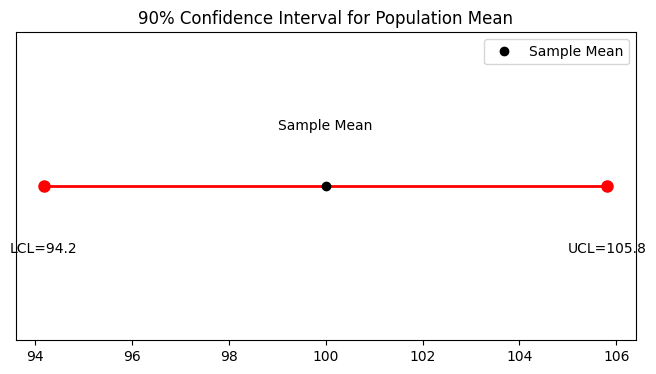

In [11]:
# Visualization
plt.figure(figsize=(8, 4))
plt.plot([lower_confidence_limit, upper_confidence_limit], [0, 0], 'ro-', linewidth=2, markersize=8)
plt.plot(sample_mean, 0, 'ko', label='Sample Mean')
plt.text(sample_mean, 0.02, 'Sample Mean', horizontalalignment='center')
plt.text(lower_confidence_limit, -0.02, f'LCL={lower_confidence_limit:.1f}', horizontalalignment='center', verticalalignment='top')
plt.text(upper_confidence_limit, -0.02, f'UCL={upper_confidence_limit:.1f}', horizontalalignment='center', verticalalignment='top')
plt.yticks([])
plt.title('90% Confidence Interval for Population Mean')
plt.legend()
plt.show()

##b. Repeat a. with 95 % confidense interval.

In [13]:
# Given values
sample_mean = 100
sigma = 25  # Population standard deviation
n = 50  # Sample size
z_score = 1.96  # Z-score for 95% confidence

# Calculate the margin of error
margin_of_error = z_score * (sigma / np.sqrt(n))

# Calculate the confidence interval
lower_confidence_limit = sample_mean - margin_of_error
upper_confidence_limit = sample_mean + margin_of_error

# Print the confidence interval
print(f'95% Confidence Interval: ({lower_confidence_limit}, {upper_confidence_limit})')

95% Confidence Interval: (93.07035354437184, 106.92964645562816)


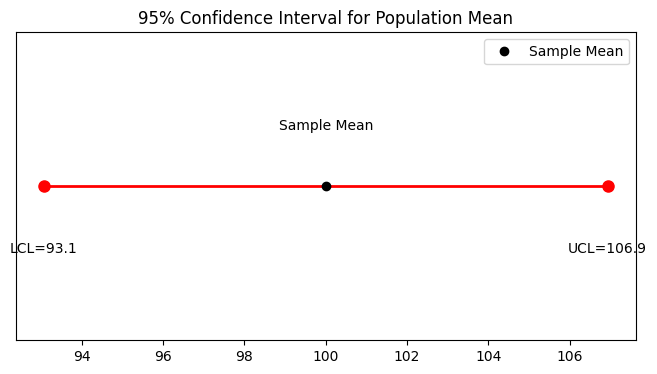

In [14]:
# Visualization
plt.figure(figsize=(8, 4))
plt.plot([lower_confidence_limit, upper_confidence_limit], [0, 0], 'ro-', linewidth=2, markersize=8)
plt.plot(sample_mean, 0, 'ko', label='Sample Mean')
plt.text(sample_mean, 0.02, 'Sample Mean', horizontalalignment='center')
plt.text(lower_confidence_limit, -0.02, f'LCL={lower_confidence_limit:.1f}', horizontalalignment='center', verticalalignment='top')
plt.text(upper_confidence_limit, -0.02, f'UCL={upper_confidence_limit:.1f}', horizontalalignment='center', verticalalignment='top')
plt.yticks([])
plt.title('95% Confidence Interval for Population Mean')
plt.legend()
plt.show()

##c. Gentag a. med 99 % konfidensinterval

In [15]:
# Given values
sample_mean = 100
sigma = 25  # Population standard deviation
n = 50  # Sample size
z_score = 2.576  # Z-score for 99% confidence

# Calculate the margin of error
margin_of_error = z_score * (sigma / np.sqrt(n))

# Calculate the confidence interval
lower_confidence_limit = sample_mean - margin_of_error
upper_confidence_limit = sample_mean + margin_of_error

# Print the confidence interval
print(f'99% Confidence Interval: ({lower_confidence_limit}, {upper_confidence_limit})')

99% Confidence Interval: (90.89246465831727, 109.10753534168273)


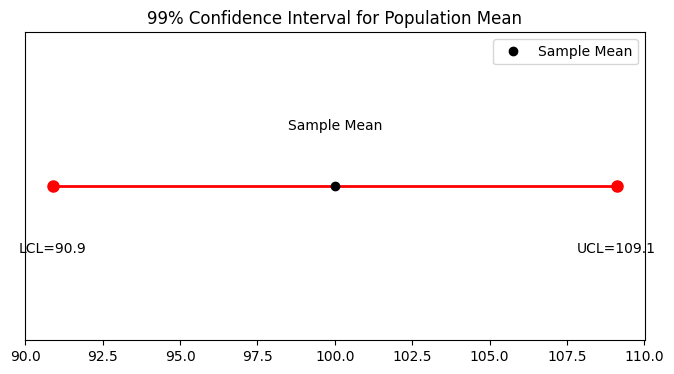

In [16]:
# Visualization
plt.figure(figsize=(8, 4))
plt.plot([lower_confidence_limit, upper_confidence_limit], [0, 0], 'ro-', linewidth=2, markersize=8)
plt.plot(sample_mean, 0, 'ko', label='Sample Mean')
plt.text(sample_mean, 0.02, 'Sample Mean', horizontalalignment='center')
plt.text(lower_confidence_limit, -0.02, f'LCL={lower_confidence_limit:.1f}', horizontalalignment='center', verticalalignment='top')
plt.text(upper_confidence_limit, -0.02, f'UCL={upper_confidence_limit:.1f}', horizontalalignment='center', verticalalignment='top')
plt.yticks([])
plt.title('99% Confidence Interval for Population Mean')
plt.legend()
plt.show()

##d. Beskriv hvordan konfidensintervallet ændrer sig, når konfidensniveauet øges

When the level of confidence increases, so does the interval range in order to account for the higher probability of a true estimate. <br>
If we break it down into a simpler example, we could take the dices: <br>
If I play a dice game, where I can only succeed or fail by rolling the right number(s), then I have a certain % chance of failing or succeeding, depending on the amount of numbers between 1-6 that counts as a success. If I want to **increase** my potential number of successes, then I need to **increase** my interval range of potentially succesful numbers. This is of course an oversimplification, but the logic remains sound.

#10.15

##a. A random sample of 25 was taken from a normal distribution with a standard deviation of 5. The sample mean is 80. Find the estimate of the population mean with a 95% confidence interval.

In [17]:
# Given values
sample_mean = 80
sigma = 5  # Population standard deviation
n = 25  # Sample size
z_score = 1.96  # Z-score for 95% confidence

# Calculate the margin of error
margin_of_error = z_score * (sigma / np.sqrt(n))

# Calculate the confidence interval
lower_confidence_limit = sample_mean - margin_of_error
upper_confidence_limit = sample_mean + margin_of_error

# Print the confidence interval
print(f'95% Confidence Interval: ({lower_confidence_limit:.2f}, {upper_confidence_limit:.2f})')

95% Confidence Interval: (78.04, 81.96)


##b. Repeat a. with a sample size of 100

We can simply adjust the variable n, and leave the others be as they remain constant, and otherwise repeat the process

In [19]:
n = 100  # New sample size

# Calculate the margin of error with the new sample size
margin_of_error = z_score * (sigma / np.sqrt(n))

# Calculate the new confidence interval
lower_confidence_limit = sample_mean - margin_of_error
upper_confidence_limit = sample_mean + margin_of_error

# Print the new confidence interval
print(f'95% Confidence Interval with n=100: ({lower_confidence_limit:.2f}, {upper_confidence_limit:.2f})')

95% Confidence Interval with n=100: (79.02, 80.98)


##c. Repeat a. with a sample size of 400

In [20]:
n = 400  # New sample size

# Calculate the margin of error with the new sample size
margin_of_error = z_score * (sigma / np.sqrt(n))

# Calculate the new confidence interval
lower_confidence_limit = sample_mean - margin_of_error
upper_confidence_limit = sample_mean + margin_of_error

# Print the new confidence interval
print(f'95% Confidence Interval with n=100: ({lower_confidence_limit:.2f}, {upper_confidence_limit:.2f})')

95% Confidence Interval with n=100: (79.51, 80.49)


##d. Describe what happens with the confidence interval when the sample size is increased.

As the sample size (*n*) increases, the width of the confidence interval decreases. This is due to the margin of error component of the confidence interval formula being inversely proportional to the square root of the sample size ($\sqrt{n}$). The margin of error is calculated using $Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$, where $Z_{\alpha/2}$ represents the Z-score corresponding to the desired confidence level, and $\sigma$ is the population standard deviation. As *n* increases, $\sqrt{n}$ also increases, which in turn decreases the margin of error and thus narrows the confidence interval. This indicates that with a larger sample size, there is greater precision in the estimation of the population parameter, leading to a more accurate estimation range.



#10.18

##a. A statistician took a random sample of 100 observations from a population with a standard deviation of 5 and found that $\bar{x} = 10$. Estimate the population mean with 90% certainty.

In [21]:
# Given values
sample_mean = 10
sigma = 5  # Population standard deviation
n = 100  # Sample size
z_score = 1.645  # Z-score for 90% confidence

# Calculate the margin of error
margin_of_error = z_score * (sigma / np.sqrt(n))

# Calculate the confidence interval
lower_confidence_limit = sample_mean - margin_of_error
upper_confidence_limit = sample_mean + margin_of_error

(lower_confidence_limit, upper_confidence_limit)

(9.1775, 10.8225)

##b. Repeat a. with a sample size of 25.

In [23]:
n = 25  # New sample size

# Recalculate the margin of error with the new sample size
margin_of_error_new = z_score * (sigma / np.sqrt(n))

# Recalculate the confidence interval with the new sample size
lower_confidence_limit_new = sample_mean - margin_of_error_new
upper_confidence_limit_new = sample_mean + margin_of_error_new

(lower_confidence_limit_new, upper_confidence_limit_new)

(8.355, 11.645)

##c. Repeat a. with a sample size of 10.

In [24]:
n = 10  # New sample size

# Recalculate the margin of error with the new sample size
margin_of_error_new = z_score * (sigma / np.sqrt(n))

# Recalculate the confidence interval with the new sample size
lower_confidence_limit_new = sample_mean - margin_of_error_new
upper_confidence_limit_new = sample_mean + margin_of_error_new

(lower_confidence_limit_new, upper_confidence_limit_new)

(7.399026624511508, 12.600973375488492)

##d. Describe what happens with the confidence interval when the sample size is decreased.

When the sample size decreases, the confidence interval widens. This widening occurs because the margin of error, which is part of the confidence interval calculation, is inversely proportional to the square root of the sample size ($\sqrt{n}$). As the sample size (*n*) becomes smaller, the denominator in the margin of error formula ($Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$) becomes smaller, which increases the margin of error and, consequently, widens the confidence interval.

A wider confidence interval implies less precision in the estimate of the population parameter, reflecting greater uncertainty about where the true parameter value lies. This is a direct consequence of having less information (a smaller sample) about the population.

#10.39

##a. Find the sample size required to estimate a population mean within 10 units, given that the population standard deviation is 50. A confidence level of 90% is considered appropriate. (Se side 290)

$$n = \left( \frac{Z_{\alpha/2} \sigma}{B} \right)^2$$

where:

- *n* is the sample size,
- $Z_{\alpha/2}$ is the Z-score for the desired confidence level (1.645 for 90% confidence),
- $\sigma$ is the population standard deviation (50),
- *B* is the margin of error (10).

In [25]:
# Given values
Z_alpha_2 = 1.645  # Z-score for 90% confidence
sigma = 50  # Population standard deviation
B = 10  # Margin of error

# Calculate sample size
n = (Z_alpha_2 * sigma / B) ** 2

# Round up to the nearest whole number since sample size must be a whole number
n_rounded = np.ceil(n)

n_rounded

68.0

##b. Repeat a. with a standard deviation of 100

In [26]:
# Given values
Z_alpha_2 = 1.645  # Z-score for 90% confidence
sigma = 100  # Population standard deviation
B = 10  # Margin of error

# Calculate sample size
n = (Z_alpha_2 * sigma / B) ** 2

# Round up to the nearest whole number since sample size must be a whole number
n_rounded = np.ceil(n)

n_rounded

271.0

##c. Repeat a. with a 95% confidence level.

In [27]:
# Update Z-score for 95% confidence level
sigma = 50
Z_alpha_2_95 = 1.96  # Z-score for 95% confidence

# Recalculate sample size for 95% confidence level
n_95 = (Z_alpha_2_95 * sigma / B) ** 2

# Round up to the nearest whole number
n_rounded_95 = np.ceil(n_95)

n_rounded_95

97.0

##d. Gentag a., hvor vi ønsker at estimere  populationens middelværdi inden for 20 enheder

In [28]:
# Update margin of error for this scenario
B_20 = 20  # New margin of error

# Recalculate sample size with new margin of error
n_20 = (Z_alpha_2 * sigma / B_20) ** 2

# Round up to the nearest whole number
n_rounded_20 = np.ceil(n_20)

n_rounded_20

17.0

#10.40 Look at assignment 10.39; what happens with the sample size when:

##a. The population's standard deviation increases

The sample size needs to increase to maintain the same level of confidence and margin of error. This is because a larger standard deviation indicates more variability in the population, requiring a larger sample to accurately estimate the population mean.

##b. The confidence level increases

Increasing the confidence level (e.g., from 90% to 95%) requires a larger sample size to ensure the wider confidence interval still captures the true population mean. The higher the confidence level, the wider the confidence interval, necessitating more data to achieve the same precision.

##c. The maximum error for the estimate increases

If you're willing to accept a larger margin of error (B), the sample size can be smaller while still achieving the desired confidence level. This is because the formula for sample size includes the margin of error in the denominator; as the margin of error increases, the required sample size decreases.

#10.49 A medical statistician wants to estimate the average weight loss in people who are on a new diet. In a preliminary study, he estimates that the standard deviation of the weight loss in the population is about 5 kg. How large a sample does he need to take to estimate the average weight loss to within 1 kg with 90% certainty

**Not sure why there are 2 equations, but I'm guessing that for some reason they added a version for kilograms and one for pounds (weight)**

For estimating the average weight loss in individuals on a new diet, with an assumed population standard deviation of weight loss around 5 kg, the sample size needed to estimate the average weight loss to within 1 kg with 90% confidence is given by:

$$n = \left( \frac{Z_{\alpha/2} \sigma}{B} \right)^2 = \left( \frac{(Z_{0.05})(5)}{1} \right)^2 = \left( \frac{(1.645)(5)}{1} \right)^2$$

And for a scenario where the standard deviation (SD) is 10 pounds and the margin of error (B) is 2 pounds:

$$n = \left( \frac{Z_{\alpha/2} \sigma}{B} \right)^2 = \left( \frac{(Z_{0.05})(10)}{2} \right)^2 = \left( \frac{(1.645)(10)}{2} \right)^2$$

In [31]:
# Given values for the first scenario
sigma_1 = 5  # Population standard deviation in kg
B_1 = 1  # Margin of error in kg

# Calculate sample size for the first scenario
n_1 = (Z_alpha_2 * sigma_1 / B_1) ** 2

# Round up to the nearest whole number for both scenarios
n_rounded_1 = np.ceil(n_1)

In [32]:
# Given values for the second scenario
sigma_2 = 10  # Population standard deviation in pounds
B_2 = 2  # Margin of error in pounds

# Recalculate sample size for the second scenario
n_2 = (Z_alpha_2 * sigma_2 / B_2) ** 2

# Round up to the nearest whole number
n_rounded_2 = np.ceil(n_2)

n_rounded_1, n_rounded_2

(68.0, 68.0)

Thus, the minimum sample size n remains the same